In [1]:
from IPython.display import Image, display

# Week3: False Asteroids
Asteroids is a famous puzzle with the following setup and rules:
- The asteroids are placed on a grid.
- The objective is to destroy all the asteroids by shooting laser beams: either vertically or horizontally.
- Determine how to destroy all the asteroids by shooting no more than the specified number of beams.

The following image is an example of an Asteroids puzzle. In this example, the board size is 4 × 4 and we have six asteroids.

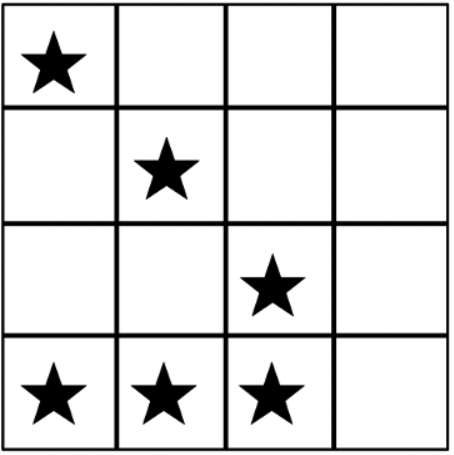

In [2]:
Image('asteroids_example.png')

As shown below, we can destroy all the asteroids by shooting 3 lasers vertically. Each thick blue line represents a laser beam. 

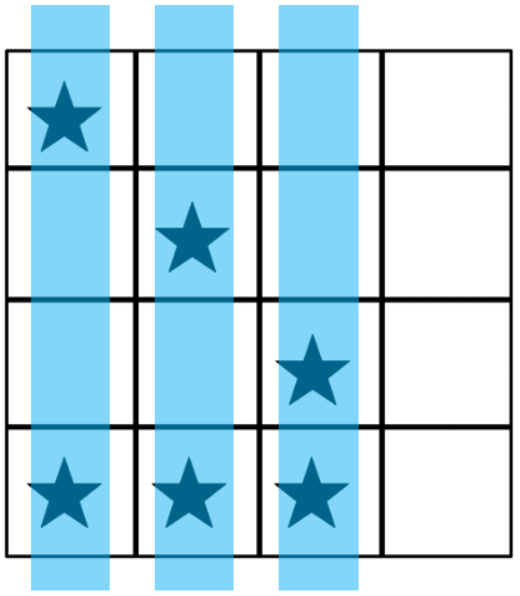

In [3]:
Image('asteroids_beam_example.png')

There are also false Asteroid problems. An Asteroid problem is false if the asteroids cannot be cleared within the specified number of beams. The following example is a false Asteroid problem with 3 laser beams.

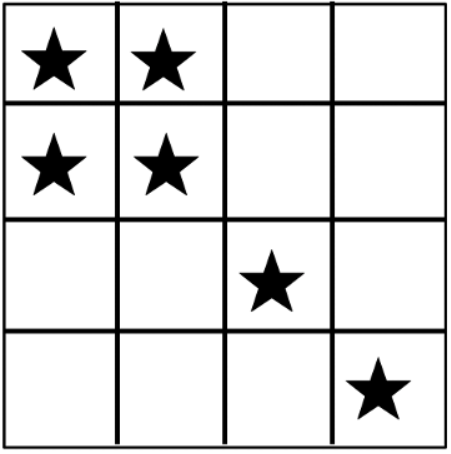

In [4]:
Image('false_asteroids_example.png')

# Invalid Solution

There are 9 different independent boards that require 4 shots with 4 asteroids, each of these boards and their respective rotations form the subset that requires 4 beams two clear. The missing two asteroids location is then irrelevant. 

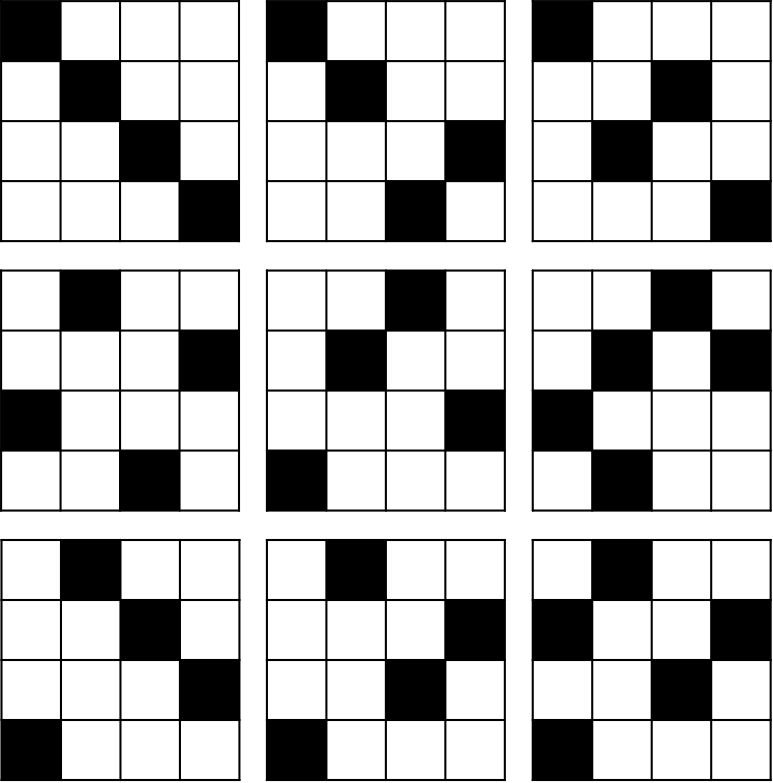

In [5]:
Image('boards.png')

----------
# Final Exercise
There are 16 areas (boards) that Dr. Ryoko needs to clear, each of which has 6 noise clusters that correspond to an asteroid in "Asteroids puzzle". However, there happens to be one area that cannot be cleared within three laser shots! Use Grover's algorithm you learned in Weeks 1 & 2 to find that one area (board)!

A board with asteroids is represented with a list of tuples. Each tuple represents the coordinate of an asteroid in the format `[row index, column index]`. Therefore, a board according to the following image can be represented as:

```
[['0', '0'], ['1', '1'], ['2', '2'], ['3', '0'], ['3', '1'], ['3', '2']]
```


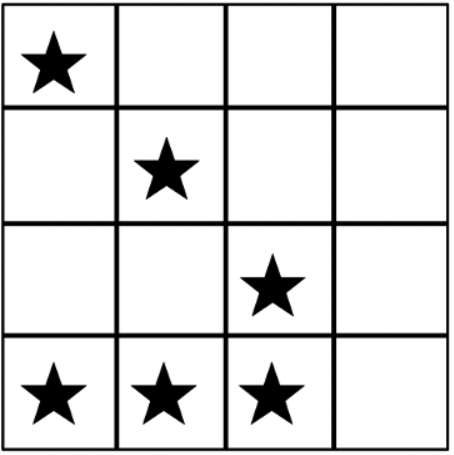

In [6]:
Image('asteroids_example.png')

There are 16 areas (boards) with the following configurations.
Find the area that cannot be cleared with 3 laser shots by using Grover's algorithm to help Dr. Ryoko!

In [7]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates import C3XGate,C4XGate
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ, Aer, execute
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

[1, 3, 5, 6, 12, 13]
[1, 4, 10, 11, 14, 15]
[2, 4, 5, 10, 13, 15]
[3, 5, 6, 8, 10, 15]
[0, 1, 5, 7, 14, 15]
[0, 2, 5, 7, 8, 14]
[0, 5, 8, 10, 13, 14]
[2, 3, 5, 11, 13, 14]
[0, 1, 10, 11, 13, 14]
[2, 3, 8, 10, 13, 14]
[0, 4, 9, 10, 13, 15]
[3, 4, 6, 8, 11, 14]
[3, 4, 7, 8, 13, 14]
[1, 3, 4, 6, 12, 15]
[1, 2, 8, 11, 12, 13]
[1, 2, 10, 11, 12, 13]


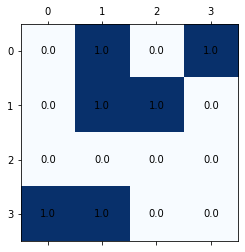

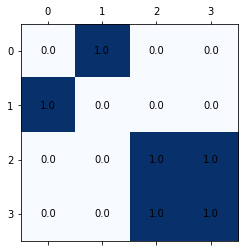

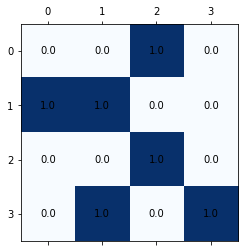

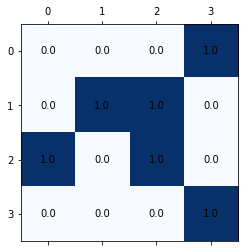

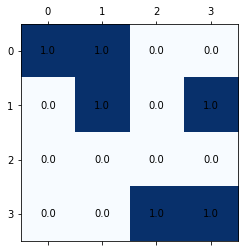

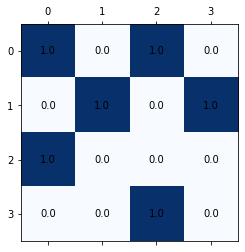

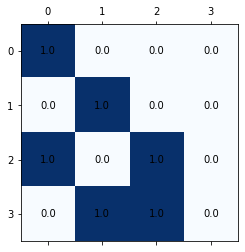

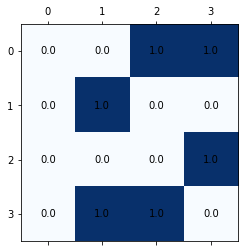

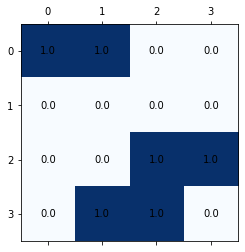

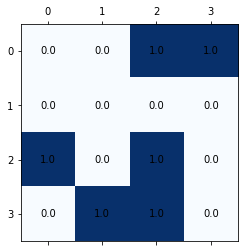

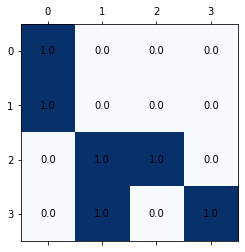

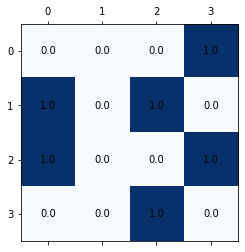

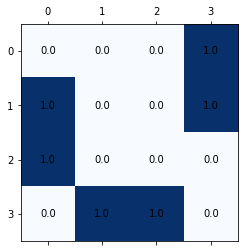

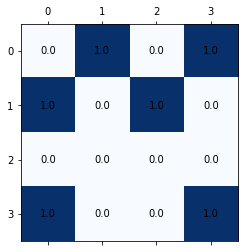

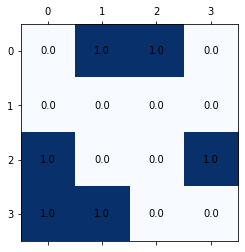

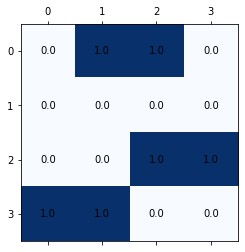

In [8]:
problem_set2 =  [[['0', '1'], ['0', '3'], ['1', '1'], ['1', '2'], ['3', '0'], ['3', '1']], [['0', '1'], ['1', '0'], ['2', '2'], ['2', '3'], ['3', '2'], ['3', '3']], [['0', '2'], ['1', '0'], ['1', '1'], ['2', '2'], ['3', '1'], ['3', '3']], [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '2'], ['3', '3']], [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']], [['0', '0'], ['0', '2'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2']], [['0', '0'], ['1', '1'], ['2', '0'], ['2', '2'], ['3', '1'], ['3', '2']], [['0', '2'], ['0', '3'], ['1', '1'], ['2', '3'], ['3', '1'], ['3', '2']], [['0', '0'], ['0', '1'], ['2', '2'], ['2', '3'], ['3', '1'], ['3', '2']], [['0', '2'], ['0', '3'], ['2', '0'], ['2', '2'], ['3', '1'], ['3', '2']], [['0', '0'], ['1', '0'], ['2', '1'], ['2', '2'], ['3', '1'], ['3', '3']], [['0', '3'], ['1', '0'], ['1', '2'], ['2', '0'], ['2', '3'], ['3', '2']], [['0', '3'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '1'], ['3', '2']], [['0', '1'], ['0', '3'], ['1', '0'], ['1', '2'], ['3', '0'], ['3', '3']], [['0', '1'], ['0', '2'], ['2', '0'], ['2', '3'], ['3', '0'], ['3', '1']], [['0', '1'], ['0', '2'], ['2', '2'], ['2', '3'], ['3', '0'], ['3', '1']]]
prob_set=[]
for st in problem_set2:
    board = []
    matr = np.zeros((4,4))
    fig, ax = plt.subplots()
    for elem in st:
        A = 4*int(elem[0])+int(elem[1])
        matr[int(elem[0]),int(elem[1])] = 1
        board.append(A)
    ax.matshow(matr, cmap=plt.cm.Blues)
    for i in range(4):
        for j in range(4):
            c = matr[j,i]
            ax.text(i, j, str(c), va='center', ha='center')
    print(board)
    prob_set.append(board)

In [9]:
def appendTheArray(arr):
    binArr.append(list(arr))

def generateAllBinaryStrings(n, arr, i):  
    if i == n: 
        appendTheArray(arr)
        return    
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1)    
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1)  
    
n = 4
arr = [None] * n
binArr = []
  
generateAllBinaryStrings(n, arr, 0) 


In [10]:
def checker(qreg_q,ancilla,circuit):
    circuit.append(C4XGate(),[qreg_q[0],qreg_q[5],qreg_q[10],qreg_q[15],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[3],qreg_q[6],qreg_q[9],qreg_q[12],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    
    circuit.append(C4XGate(),[qreg_q[0],qreg_q[5],qreg_q[11],qreg_q[14],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[2],qreg_q[7],qreg_q[9],qreg_q[12],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[3],qreg_q[6],qreg_q[8],qreg_q[13],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[1],qreg_q[4],qreg_q[10],qreg_q[15],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    
    circuit.append(C4XGate(),[qreg_q[3],qreg_q[5],qreg_q[10],qreg_q[12],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[0],qreg_q[6],qreg_q[9],qreg_q[15],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    
    circuit.append(C4XGate(),[qreg_q[1],qreg_q[7],qreg_q[8],qreg_q[14],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[2],qreg_q[4],qreg_q[11],qreg_q[13],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    
    circuit.append(C4XGate(),[qreg_q[1],qreg_q[6],qreg_q[11],qreg_q[12],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[2],qreg_q[5],qreg_q[8],qreg_q[15],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[3],qreg_q[4],qreg_q[9],qreg_q[14],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[0],qreg_q[7],qreg_q[10],qreg_q[13],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    
    circuit.append(C4XGate(),[qreg_q[1],qreg_q[7],qreg_q[10],qreg_q[12],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[1],qreg_q[6],qreg_q[8],qreg_q[15],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[3],qreg_q[5],qreg_q[8],qreg_q[14],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[0],qreg_q[7],qreg_q[9],qreg_q[14],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    
    circuit.append(C4XGate(),[qreg_q[2],qreg_q[5],qreg_q[11],qreg_q[12],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[2],qreg_q[4],qreg_q[9],qreg_q[15],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[3],qreg_q[4],qreg_q[10],qreg_q[13],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    circuit.append(C4XGate(),[qreg_q[0],qreg_q[6],qreg_q[11],qreg_q[13],qreg_q[16]])
    circuit.barrier(qreg_q[:16])
    
    
    circuit.mct([qreg_q[1],qreg_q[3],qreg_q[4],qreg_q[10],qreg_q[12]],qreg_q[16],ancilla[:], mode='basic')
    circuit.barrier(qreg_q[:16])
    circuit.mct([qreg_q[0],qreg_q[6],qreg_q[8],qreg_q[13],qreg_q[15]],qreg_q[16],ancilla[:], mode='basic')
    circuit.barrier(qreg_q[:16])
    circuit.mct([qreg_q[3],qreg_q[5],qreg_q[11],qreg_q[12],qreg_q[14]],qreg_q[16],ancilla[:], mode='basic')
    circuit.barrier(qreg_q[:16])
    circuit.mct([qreg_q[0],qreg_q[2],qreg_q[7],qreg_q[9],qreg_q[15]],qreg_q[16],ancilla[:], mode='basic')
    circuit.barrier(qreg_q[:16])
    
    circuit.mct([qreg_q[2],qreg_q[5],qreg_q[7],qreg_q[8],qreg_q[13]],qreg_q[16],ancilla[:], mode='basic')
    circuit.barrier(qreg_q[:16])
    circuit.mct([qreg_q[1],qreg_q[4],qreg_q[9],qreg_q[11],qreg_q[14]],qreg_q[16],ancilla[:], mode='basic')
    circuit.barrier(qreg_q[:16])
    circuit.mct([qreg_q[2],qreg_q[7],qreg_q[8],qreg_q[10],qreg_q[13]],qreg_q[16],ancilla[:], mode='basic')
    circuit.barrier(qreg_q[:16])
    circuit.mct([qreg_q[1],qreg_q[4],qreg_q[6],qreg_q[11],qreg_q[14]],qreg_q[16],ancilla[:], mode='basic')
    circuit.barrier(qreg_q[:16])    
    
    
    
    return circuit

In [11]:
def Qboard(qreg_q,ancilla,circuit,board,binArr):
    circuit.barrier()
    for x in board:
        circuit.x(qreg_q[x])
    checker(qreg_q,ancilla,circuit)
    for i in range(4):
        if binArr[i]==1:
            circuit.cx(qreg_q[16],qreg_q[i+17])

    circuit.barrier()
    
    return circuit

In [12]:
qreg_q = QuantumRegister(21)
ancilla = QuantumRegister(4)
creg_c = ClassicalRegister(4)
circuit = QuantumCircuit(qreg_q,ancilla,creg_c)

for m in range(16):
    Qboard(qreg_q,ancilla,circuit,prob_set[m],binArr[m])

circuit.measure(qreg_q[17], creg_c[0])
circuit.measure(qreg_q[18], creg_c[1])
circuit.measure(qreg_q[19], creg_c[2])
circuit.measure(qreg_q[20], creg_c[3])

# circuit.draw(output='mpl')


C:\Users\Nemo\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  


{'0010': 1000}


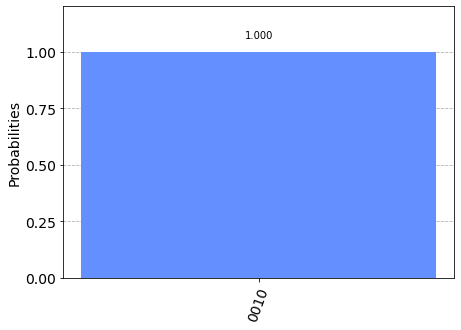

In [13]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
print(count)
plot_histogram(count)